In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks
from scipy.signal import peak_widths

In [220]:
def theta(E):
    return 180 / np.pi * np.arcsin(const.h * const.c / (2 * 201.4e-12 * const.e * E))


def sigma(E, Z):
    return Z - np.sqrt((E / 13.6) - ((1 / 137) ** 2 * Z ** 4) / 4)


def s1(E):
    return 29 - np.sqrt(E / 13.6)


def s2(E, s1):
    return 29 - np.sqrt(4 * (29 - s1) ** 2 - 4 * E / 13.6)


def s3(E, s1):
    return 29 - np.sqrt(9 * (29 - s1) ** 2 - 9 * E / 13.6)


def energ(the):
    return const.h * const.c / (2 * 201.4e-12 * np.sin(np.pi / 180 * the) * const.e)

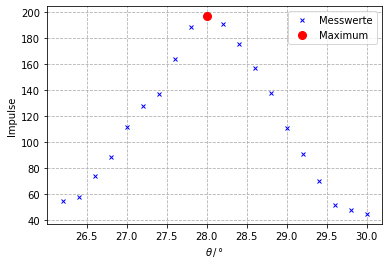

In [221]:
data = pd.read_csv('tables/messdaten/Bragg/bragg_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

plt.plot(
    x, y , color="b", ms=4, marker="x", linestyle="", label="Messwerte",
)
plt.plot(
    x[x == 28],
    y[x == 28],
    color="red",
    ms=8,
    marker="o",
    linestyle="",
    label="Maximum",
)
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle="dashed")
plt.show()

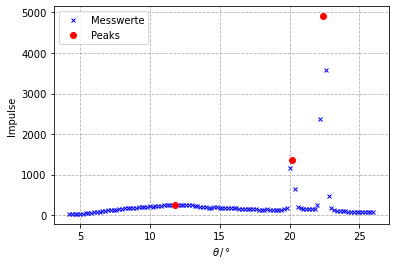

In [222]:
data = pd.read_csv('tables/messdaten/Messung_2/Kupferemission1_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

max_brems = np.max(y[x<=18])
# x_max_brems = x[y==max_brems]
# print(x_max_brems[0])

plt.plot(
    x, y , color="b", ms=4, marker="x", linestyle="", label="Messwerte",
)
N_loc = find_peaks(y, height=max_brems)
peak_loc = N_loc[0]
plt.plot(
    x[peak_loc],
    y[peak_loc],
    color="red",
    marker="o",
    linestyle="",
    label="Peaks",
)
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle="dashed")
plt.show()

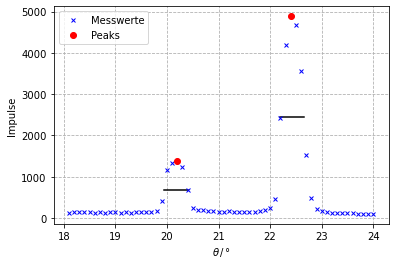

[24.28919067 12.61982959]
[21.933786    4.42974438]


In [223]:
data = pd.read_csv('tables/messdaten/Messung_2/Kupferemission2_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

N_loc = find_peaks(y, height=1000)
peak_loc = N_loc[0]

spline = UnivariateSpline(
    x[peak_loc[0] + 5 : peak_loc[1] + 15],
    y[peak_loc[0] + 5 : peak_loc[1] + 15]
    - np.max(y[peak_loc[0] - 15 : peak_loc[1] + 15]) / 2,
    s=0,
)
r1a, r2a = spline.roots()
spline = UnivariateSpline(
    x[peak_loc[0] - 15 : peak_loc[1] - 5],
    y[peak_loc[0] - 15 : peak_loc[1] - 5]
    - np.max(y[peak_loc[0] - 15 : peak_loc[1] - 5]) / 2,
    s=0,
)
r1b, r2b = spline.roots()
plt.plot(
    [r1a, r2a],
    [N_loc[1]["peak_heights"][1] / 2, N_loc[1]["peak_heights"][1] / 2],
    color='k',
)
plt.plot(
    [r1b, r2b],
    [N_loc[1]["peak_heights"][0] / 2, N_loc[1]["peak_heights"][0] / 2],
    color='k',
)


plt.plot(
    x, y , color="b", ms=4, marker="x", linestyle="", label="Messwerte",
)
N_loc = find_peaks(y, height=1000)
peak_loc = N_loc[0]
plt.plot(
    x[peak_loc],
    y[peak_loc],
    color="red",
    marker="o",
    linestyle="",
    label="Peaks",
)
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle="dashed")
plt.show()

FWAHMa = abs(energ(r2a) - energ(r1a))
FWAHMb = abs(energ(r2b) - energ(r1b))
# print(FWAHMa)
# print(FWAHMb)
# print(energ(x[peak_loc]))
# print(energ(x[peak_loc[0]]) / FWAHMa)
# print(energ(x[peak_loc[1]]) / FWAHMb)

print(s2(energ(x[peak_loc]), 3.29))
print(s3(energ(x[peak_loc]), 3.29))


13529.857793324712
13.149999999999999


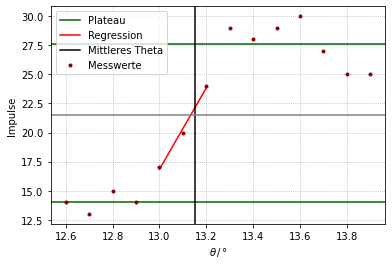

In [224]:
# Brom
data = pd.read_csv('tables/messdaten/Messung_Brom/Brom_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

rel_min = np.min(y)
rel_max = np.max(y)
theta_mitte_y = (rel_max - rel_min) / 2
theta_mitte = (x[y==rel_max] - x[y==rel_min]) / 2


x1 = np.diff(y)
# print(x1)
tolger = 3
x3 = []
x4 = []
x8 = []
n = 0
for i in range(len(x1)):
    if n == 0:
        if abs(x1[i]) < tolger:
            x3.append(i)
        else:
            x8.append(i)
            n = 1
    else:
        if abs(x1[i]) < tolger:
            x4.append(i)

        else:
            x8.append(i)
            n = 1

x5 = []
for i in range(len(x3)):
    x5.append(y[x3[i]])

plt.axhline(np.mean(x5),c='darkgreen',  label='Plateau')
x6 = []
for i in range(len(x4)):
    x6.append(y[x4[i]])

plt.axhline(np.mean(x6), c='darkgreen')
y2 = np.mean(x6) + (np.mean(x5) - np.mean(x6)) / 2
regx = x[x8]
regy = y[x8]
regx = regx[1:-1]
regy = regy[1:-1]


def f(x, a, b):
    return a * x + b


params, covariance_matrix = curve_fit(f, regx, regy)

# errors = np.sqrt(np.diag(covariance_matrix))
energy = energ((x[y==rel_min] + theta_mitte)[0])
print(energy)
print((x[y==rel_min] + theta_mitte)[0])


plt.plot(
    regx,
    f(regx, params[0], params[1]),
    color="red",
    ms=4,
    marker="",
    linestyle="-",
    label="Regression",
)

plt.axvline(x[y==rel_min] + theta_mitte, c='k', label='Mittleres Theta')
plt.axhline(rel_min + theta_mitte_y, c='grey')

plt.plot(x, y, color="darkred", ms=6, marker=".", linestyle="", label="Messwerte")
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle=":")

9700.640973397947
18.549999999999997


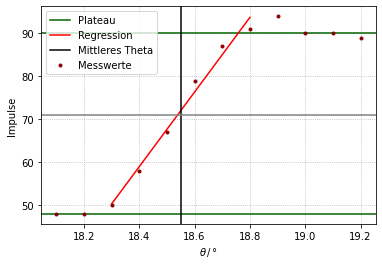

In [245]:
data = pd.read_csv('tables/messdaten/Messung_Zink/Zink_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

rel_min = np.min(y)
rel_max = np.max(y)
theta_mitte_y = (rel_max - rel_min) / 2
theta_mitte = (x[y==rel_max] - x[y==rel_min]) / 2


x1 = np.diff(y)
# print(x1)
tolger = 2
x3 = []
x4 = []
x8 = []
n = 0
for i in range(len(x1)):
    if n == 0:
        if abs(x1[i]) < tolger:
            x3.append(i)
        else:
            x8.append(i)
            n = 1
    else:
        if abs(x1[i]) < tolger:
            x4.append(i)

        else:
            x8.append(i)
            n = 1

x5 = []
for i in range(len(x3)):
    x5.append(y[x3[i]])

plt.axhline(np.mean(x5),c='darkgreen',  label='Plateau')
x6 = []
for i in range(len(x4)):
    x6.append(y[x4[i]])

plt.axhline(np.mean(x6), c='darkgreen')
y2 = np.mean(x6) + (np.mean(x5) - np.mean(x6)) / 2
regx = x[x8]
regy = y[x8]
regx = regx[1:-1]
regy = regy[1:-1]


def f(x, a, b):
    return a * x + b


params, covariance_matrix = curve_fit(f, regx, regy)

# errors = np.sqrt(np.diag(covariance_matrix))
energy = energ((x[y==rel_min] + theta_mitte)[0])
print(energy)
print((x[y==rel_min] + theta_mitte)[1])


plt.plot(
    regx,
    f(regx, params[0], params[1]),
    color="red",
    ms=4,
    marker="",
    linestyle="-",
    label="Regression",
)

plt.axvline((x[y==rel_min])[1] + theta_mitte[1], c='k', label='Mittleres Theta')
plt.axhline(rel_min + theta_mitte_y, c='grey')

plt.plot(x, y, color="darkred", ms=6, marker=".", linestyle="", label="Messwerte")
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle=":")

[[16.3 30. ]
 [16.4 29. ]
 [16.5 31. ]
 [16.6 27. ]
 [16.7 28. ]
 [16.8 29. ]
 [16.9 30. ]
 [17.  29. ]
 [17.1 34. ]
 [17.3 43. ]
 [17.4 50. ]
 [17.5 51. ]
 [17.6 52. ]
 [17.7 49. ]
 [17.8 48. ]
 [17.9 50. ]
 [18.  47. ]
 [18.1 47. ]
 [18.2 43. ]]
10468.151089621468
[17.1]


/home/toby_linux/.local/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/toby_linux/.local/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


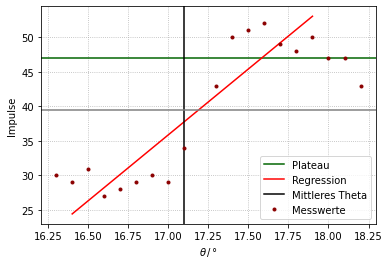

In [277]:
data = pd.read_csv('tables/messdaten/Messung_Gallium/Gallium_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
data = np.delete(data, 9, 0)
print(data)
x = data[:,0]
y = data[:,1]

rel_min = np.min(y)
rel_max = np.max(y)
theta_mitte_y = (rel_max - rel_min) / 2
theta_mitte = (x[y==rel_max] - x[y==rel_min]) / 2


x1 = np.diff(y)
# print(x1)
tolger = 1
x3 = []
x4 = []
x8 = []
n = 0
for i in range(len(x1)):
    if n == 0:
        if abs(x1[i]) < tolger:
            x3.append(i)
        else:
            x8.append(i)
            n = 1
    else:
        if abs(x1[i]) < tolger:
            x4.append(i)

        else:
            x8.append(i)
            n = 1

x5 = []
for i in range(len(x3)):
    x5.append(y[x3[i]])

plt.axhline(np.mean(x5),c='darkgreen',  label='Plateau')
x6 = []
for i in range(len(x4)):
    x6.append(y[x4[i]])

plt.axhline(np.mean(x6), c='darkgreen')
y2 = np.mean(x6) + (np.mean(x5) - np.mean(x6)) / 2
regx = x[x8]
regy = y[x8]
regx = regx[1:-1]
regy = regy[1:-1]


def f(x, a, b):
    return a * x + b


params, covariance_matrix = curve_fit(f, regx, regy)

# errors = np.sqrt(np.diag(covariance_matrix))
energy = energ((x[y==rel_min] + theta_mitte)[0])
print(energy)
print((x[y==rel_min] + theta_mitte))


plt.plot(
    regx,
    f(regx, params[0], params[1]),
    color="red",
    ms=4,
    marker="",
    linestyle="-",
    label="Regression",
)

plt.axvline((x[y==rel_min]) + theta_mitte, c='k', label='Mittleres Theta')
plt.axhline(rel_min + theta_mitte_y, c='grey')

plt.plot(x, y, color="darkred", ms=6, marker=".", linestyle="", label="Messwerte")
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle=":")

16059.529152872012
[11.05]


/home/toby_linux/.local/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/toby_linux/.local/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


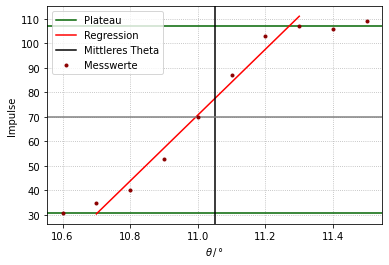

In [287]:
data = pd.read_csv('tables/messdaten/Messung_Strontium/Strontium_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

rel_min = np.min(y)
rel_max = np.max(y)
theta_mitte_y = (rel_max - rel_min) / 2
theta_mitte = (x[y==rel_max] - x[y==rel_min]) / 2


x1 = np.diff(y)
# print(x1)
tolger = 1
x3 = []
x4 = []
x8 = []
n = 0
for i in range(len(x1)):
    if n == 0:
        if abs(x1[i]) < tolger:
            x3.append(i)
        else:
            x8.append(i)
            n = 1
    else:
        if abs(x1[i]) < tolger:
            x4.append(i)

        else:
            x8.append(i)
            n = 1

x5 = []
for i in range(len(x3)):
    x5.append(y[x3[i]])

plt.axhline(np.mean(y[-3]),c='darkgreen',  label='Plateau')
x6 = []
for i in range(len(x4)):
    x6.append(y[x4[i]])

plt.axhline(np.mean(y[:1]), c='darkgreen')
y2 = np.mean(x6) + (np.mean(x5) - np.mean(x6)) / 2
regx = x[x8]
regy = y[x8]
regx = regx[1:-1]
regy = regy[1:-1]


def f(x, a, b):
    return a * x + b


params, covariance_matrix = curve_fit(f, regx, regy)

# errors = np.sqrt(np.diag(covariance_matrix))
energy = energ((x[y==rel_min] + theta_mitte)[0])
print(energy)
print((x[y==rel_min] + theta_mitte))


plt.plot(
    regx,
    f(regx, params[0], params[1]),
    color="red",
    ms=4,
    marker="",
    linestyle="-",
    label="Regression",
)

plt.axvline((x[y==rel_min]) + theta_mitte, c='k', label='Mittleres Theta')
plt.axhline(rel_min + theta_mitte_y, c='grey')

plt.plot(x, y, color="darkred", ms=6, marker=".", linestyle="", label="Messwerte")
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle=":")

17903.069032356394
9.95


/home/toby_linux/.local/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/toby_linux/.local/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


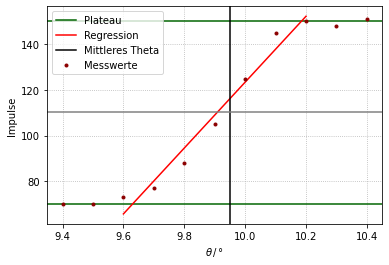

In [285]:
data = pd.read_csv('tables/messdaten/Messung_zirkonium/zirkonium_2.txt', decimal=',', delimiter = "\t")
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

rel_min = np.min(y)
rel_max = np.max(y)
theta_mitte_y = (rel_max - rel_min) / 2
theta_mitte = (x[y==rel_max] - x[y==rel_min]) / 2


x1 = np.diff(y)
# print(x1)
tolger = 2
x3 = []
x4 = []
x8 = []
n = 0
for i in range(len(x1)):
    if n == 0:
        if abs(x1[i]) < tolger:
            x3.append(i)
        else:
            x8.append(i)
            n = 1
    else:
        if abs(x1[i]) < tolger:
            x4.append(i)

        else:
            x8.append(i)
            n = 1

x5 = []
for i in range(len(x3)):
    x5.append(y[x3[i]])

plt.axhline(np.mean(x5),c='darkgreen',  label='Plateau')
x6 = []
for i in range(len(x4)):
    x6.append(y[x4[i]])

plt.axhline(np.mean(y[-3]), c='darkgreen')
y2 = np.mean(x6) + (np.mean(x5) - np.mean(x6)) / 2
regx = x[x8]
regy = y[x8]
regx = regx[1:-1]
regy = regy[1:-1]


def f(x, a, b):
    return a * x + b


params, covariance_matrix = curve_fit(f, regx, regy)

# errors = np.sqrt(np.diag(covariance_matrix))
energy = energ((x[y==rel_min] + theta_mitte)[0])
print(energy)
print((x[y==rel_min] + theta_mitte)[1])


plt.plot(
    regx,
    f(regx, params[0], params[1]),
    color="red",
    ms=4,
    marker="",
    linestyle="-",
    label="Regression",
)

plt.axvline((x[y==rel_min])[1] + theta_mitte[1], c='k', label='Mittleres Theta')
plt.axhline(rel_min + theta_mitte_y, c='grey')

plt.plot(x, y, color="darkred", ms=6, marker=".", linestyle="", label="Messwerte")
plt.xlabel(r"$\theta \, / \, °$")
plt.ylabel(r"Impulse")
plt.legend(loc="best")
plt.grid(linestyle=":")

Tabellen für Anhang erstellen

In [ ]:
data = pd.read_csv('tables/messdaten/Messung_2/Kupferemission1_2.txt', decimal=',', delimiter = "\t")
print(data.to_latex(index = False, column_format= "c c", decimal=',')) 

\begin{tabular}{c c}
\toprule
 4,0 &   27,0 \\
\midrule
 4,2 &   32,0 \\
 4,4 &   32,0 \\
 4,6 &   41,0 \\
 4,8 &   33,0 \\
 5,0 &   32,0 \\
 5,2 &   38,0 \\
 5,4 &   46,0 \\
 5,6 &   52,0 \\
 5,8 &   63,0 \\
 6,0 &   70,0 \\
 6,2 &   76,0 \\
 6,4 &   81,0 \\
 6,6 &   93,0 \\
 6,8 &  105,0 \\
 7,0 &  119,0 \\
 7,2 &  119,0 \\
 7,4 &  133,0 \\
 7,6 &  130,0 \\
 7,8 &  144,0 \\
 8,0 &  158,0 \\
 8,2 &  167,0 \\
 8,4 &  172,0 \\
 8,6 &  185,0 \\
 8,8 &  174,0 \\
 9,0 &  186,0 \\
 9,2 &  200,0 \\
 9,4 &  193,0 \\
 9,6 &  207,0 \\
 9,8 &  213,0 \\
10,0 &  218,0 \\
10,2 &  212,0 \\
10,4 &  218,0 \\
10,6 &  234,0 \\
10,8 &  230,0 \\
11,0 &  240,0 \\
11,2 &  253,0 \\
11,4 &  253,0 \\
11,6 &  253,0 \\
11,8 &  257,0 \\
12,0 &  246,0 \\
12,2 &  255,0 \\
12,4 &  247,0 \\
12,6 &  254,0 \\
12,8 &  246,0 \\
13,0 &  242,0 \\
13,2 &  230,0 \\
13,4 &  215,0 \\
13,6 &  200,0 \\
13,8 &  208,0 \\
14,0 &  192,0 \\
14,2 &  190,0 \\
14,4 &  190,0 \\
14,6 &  196,0 \\
14,8 &  192,0 \\
15,0 &  169,0 \\
15,2 &  1

/tmp/ipykernel_5099/2820144883.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.to_latex(index = False, column_format= "c c", decimal=','))
